In [21]:
import ribopy
from ribopy import Ribo

import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
# Some formatting forthe rest of the notebook
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [4]:
ribo_path   = "/data/projects/ITP/runs/20201104_ITP_100/output/ribo/all.ribo"
ribo_object = Ribo(ribo_path, alias = ribopy.api.alias.apris_human_alias)
ribo_object.print_info()

Ribo File Info:
---------------
Ribo File Version : 1.0
RiboPy Version    : 0.0.0
Creation Time     : 2020-11-16 01:26:07
Reference         : appris-v1
Min Read Length   : 15
Max Read Length   : 40
Metagene Radius   : 50
Left Span         : 35
Right Span        : 10

Experiments:
------------ 
Name                               Reads  Coverage  RNA-Seq  Metadata
20201104-ITP-100-1mM-10           378202         *                   
20201104-ITP-100-1mM-5           1305050         *                   
20201104-ITP-100-1mM-50           757782         *                   
20201104-ITP-100-2mM-100-1        383220         *                   
20201104-ITP-100-2mM-100-2        438483         *                   
20201104-ITP-100-2mM-50-1         405334         *                   
20201104-ITP-100-2mM-50-2         488737         *                   
20201104-ITP-100-5mM-15          1028517         *                   
20201104-ITP-100-5mM-150-1        327467         *                   
20201

In [5]:
coverage_data_30 = ribo_object.get_coverage(experiment  = "20201104-ITP-100-2mM-50-1", 
                                         alias       = True,
                                         range_lower = 30,
                                         range_upper = 30)

In [6]:
coverage_data_30

OrderedDict([('OR4F5-201', array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)),
             ('OR4F29-201',
              array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                     0, 0, 0

In [9]:
ribo_object.transcript_lengths

transcript_lengths = {}

for long_name in ribo_object.transcript_lengths.keys():
    short_name = ribopy.api.alias.apris_human_alias(long_name)
    transcript_lengths[short_name] = ribo_object.transcript_lengths[long_name]


In [11]:
len(transcript_lengths)

19822

In [18]:
def find_coverage_percentages(coverage_dict):
    """
    Assumes each entry in the coverage is 0 or 1.
    It determines the raio of covered nucleotides in each transcript
    So it returns a dict of the form:
        
    """
    result = dict()
    
    for gene, coverage in coverage_dict.items():
        result[gene] = np.mean(coverage)
        
    return result
        

In [19]:
coverage_ratios = find_coverage_percentages(coverage_data_30)

<AxesSubplot:ylabel='Density'>

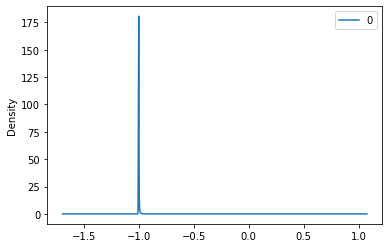

In [26]:
pd.DataFrame(  np.log10(np.add(list(coverage_ratios.values()), 0.1) ) ).plot(kind='density')